In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\nmadh\Downloads\Data_Train.xlsx - Sheet1.csv")

In [7]:
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [8]:
data.shape

(10683, 11)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
data.dropna(inplace =True,axis =0)

In [12]:
#splitting the journey date

In [14]:
journey_date = []
journey_month = []
journey_year = []

for i in range(len(data)):
    Date = data['Date_of_Journey'].iloc[i].split('/')
    journey_date.append(Date[0])
    journey_month.append(Date[1])
    journey_year.append(Date[2])

data['Journey_Date'] = journey_date
data['Journey_Month'] = journey_month
data['Journey_Year'] = journey_year

In [15]:
data.drop('Date_of_Journey', axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [16]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [17]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])

In [18]:
def part_time(data,col):
    data[col + '_Hour'] = data[col].dt.hour
    data[col + '_Minute'] = data[col].dt.minute
    return data[col + '_Hour'], data[col + '_Minute']

In [19]:
data['Dep_Time_Hour'],data['Dep_Time_Minute'] = part_time(data,'Dep_Time')

In [20]:
data['Arrival_Time_Hour'],data['Arrival_Time_Minute'] = part_time(data,'Arrival_Time')


In [21]:
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35


In [22]:
def dep_moment(time):
    if (time > 4) and (time <= 8):
        return 'Early Morning'
    elif (time > 8) and (time <= 12):
        return 'Morning'
    elif (time > 12) and (time <= 16):
        return 'Noon'
    elif (time > 16)  and (time <= 20):
        return 'EVening'
    elif (time > 20)  and (time <= 24):
        return 'Night'
    else:
        return 'Late Night'

<Axes: >

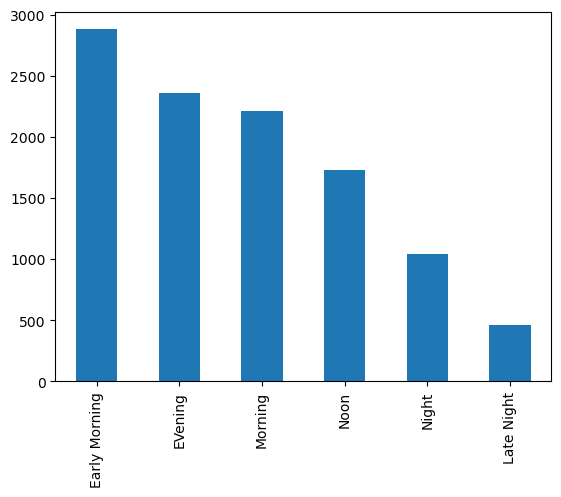

In [23]:
data['Dep_Time_Hour'].apply(dep_moment).value_counts().plot(kind='bar')

<Axes: title={'center': 'Airline Vs Price'}, xlabel='Price', ylabel='Airline'>

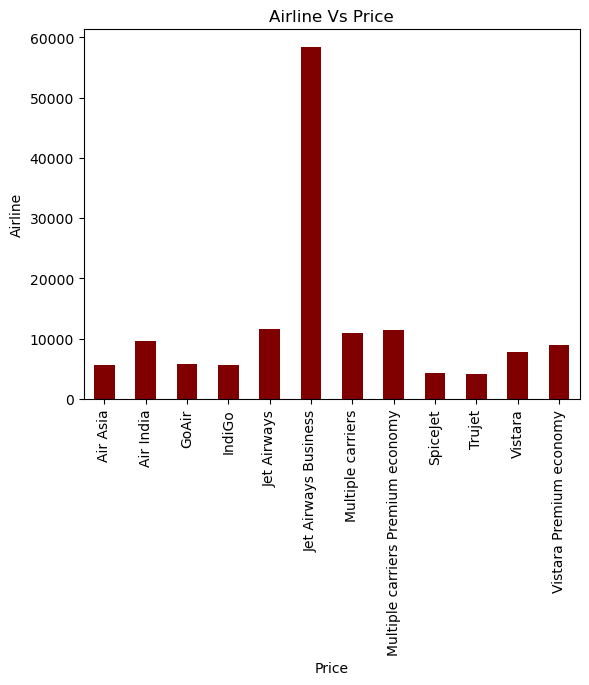

In [24]:
data1 = data.groupby('Airline')['Price'].mean()
data1.plot(kind='bar',title='Airline Vs Price',xlabel = 'Price',ylabel ='Airline',color ='maroon')

<Axes: xlabel='Journey_Month'>

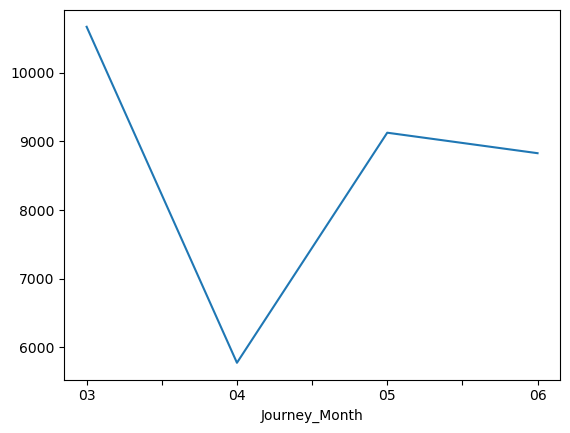

In [25]:
data.groupby('Journey_Month')['Price'].mean().plot()

In [27]:
def preprocess_duration(x):
    x = str(x) 

    if 'h' not in x:
        x = '0h' + ' ' + x
    if 'm' not in x:
        x = x + ' ' + '0m'

    time = x.split(' ')
    hour = int(time[0][0:-1])
    minute = int(time[1][0:-1])

    return hour * 60 + minute

data['Duration_in_min'] = data['Duration'].apply(preprocess_duration)
data['Duration_in_min']
data.drop('Duration',inplace=True,axis=1)

<Axes: xlabel='Duration_in_min', ylabel='Price'>

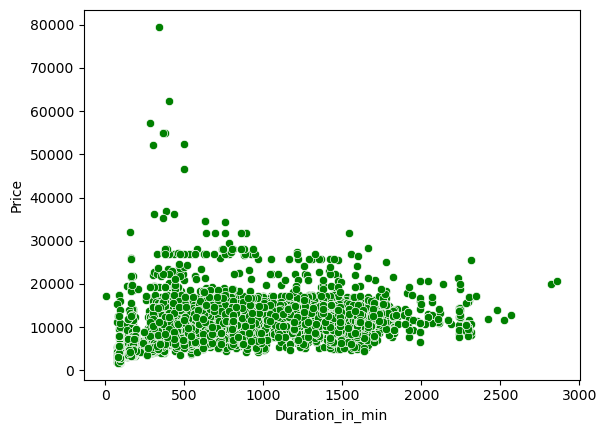

In [28]:
sns.scatterplot(x='Duration_in_min',y='Price',data=data,color ='green')

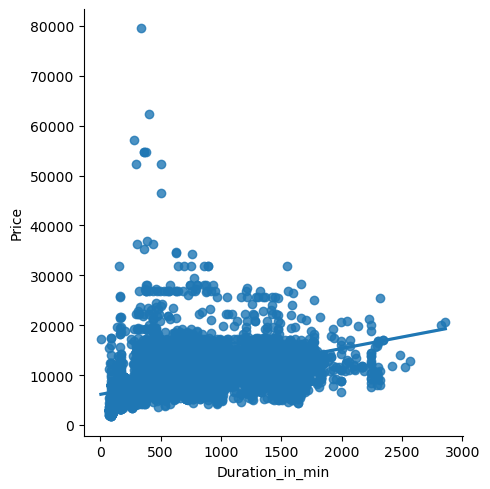

In [29]:
sns.lmplot(x='Duration_in_min',y='Price',data=data)

<Axes: xlabel='Total_Stops', ylabel='Price'>

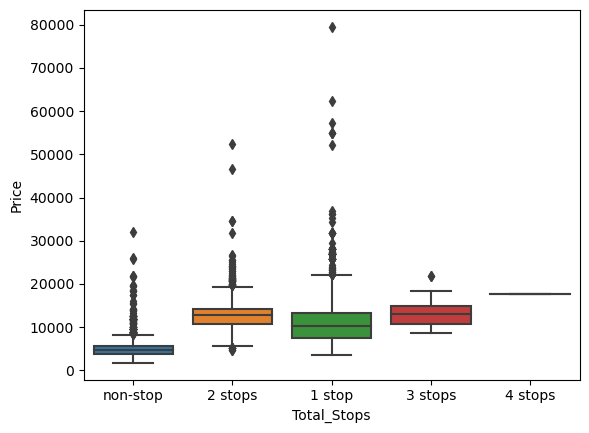

In [30]:
sns.boxplot(x='Total_Stops',y='Price',data =data)

<Axes: xlabel='Duration_in_min', ylabel='Price'>

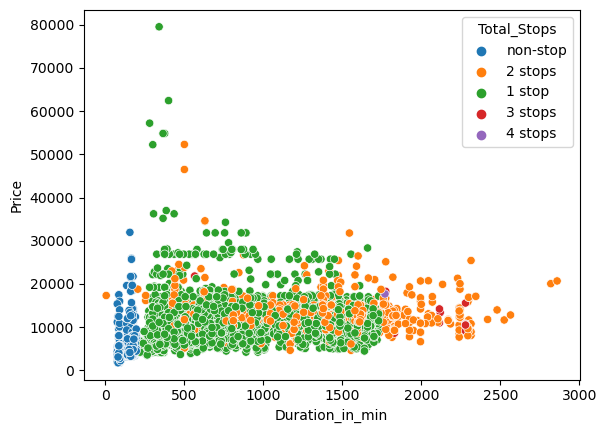

In [31]:
sns.scatterplot(x='Duration_in_min',y='Price',data=data,hue='Total_Stops')

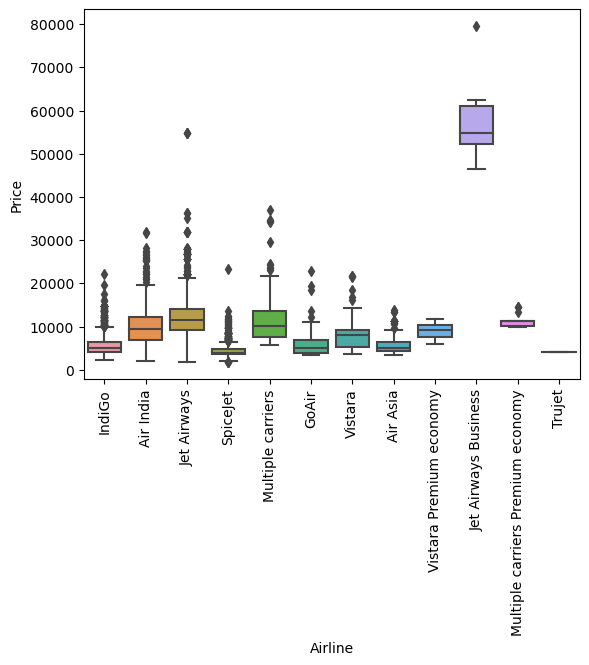

In [32]:
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(rotation=90)
plt.show()

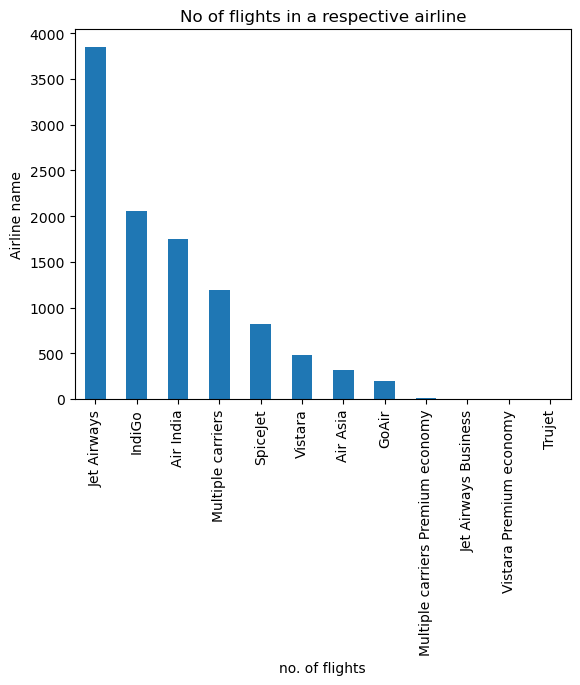

In [33]:
ax = data['Airline'].value_counts().plot(kind='bar')

ax.set_xlabel('no. of flights')
ax.set_ylabel('Airline name')
ax.set_title('No of flights in a respective airline')

plt.show()

In [34]:
#feature encoding

In [35]:
source_index= data['Source'].unique()
source_index

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [36]:
source_dic = { key : value for value,key in enumerate(source_index,1)}
source_dic

{'Banglore': 1, 'Kolkata': 2, 'Delhi': 3, 'Chennai': 4, 'Mumbai': 5}

In [37]:
data['Source'] = data['Source'].map(source_dic)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
0,IndiGo,1,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,2019,22,20,1,10,170
1,Air India,2,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,2019,5,50,13,15,445
2,Jet Airways,3,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,2019,9,25,4,25,1140
3,IndiGo,2,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,05,2019,18,5,23,30,325
4,IndiGo,1,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,01,03,2019,16,50,21,35,285


In [38]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [39]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [40]:
des_index= data['Destination'].unique()
des_index


array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [41]:
des_dic = {key:value for value, key in enumerate(des_index,1)}
des_dic

{'Delhi': 1, 'Banglore': 2, 'Cochin': 3, 'Kolkata': 4, 'Hyderabad': 5}

In [42]:
data['Destination'] =data['Destination'].map(des_dic)

In [43]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
0,IndiGo,1,1,BLR → DEL,non-stop,No info,3897,24,03,2019,22,20,1,10,170
1,Air India,2,2,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,2019,5,50,13,15,445
2,Jet Airways,3,3,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,2019,9,25,4,25,1140
3,IndiGo,2,2,CCU → NAG → BLR,1 stop,No info,6218,12,05,2019,18,5,23,30,325
4,IndiGo,1,1,BLR → NAG → DEL,1 stop,No info,13302,01,03,2019,16,50,21,35,285


In [44]:
airline_data = data.groupby('Airline')['Price'].mean().sort_values(ascending =False)
airline_index = airline_data.index
airline_index

Index(['Jet Airways Business', 'Jet Airways',
       'Multiple carriers Premium economy', 'Multiple carriers', 'Air India',
       'Vistara Premium economy', 'Vistara', 'GoAir', 'IndiGo', 'Air Asia',
       'SpiceJet', 'Trujet'],
      dtype='object', name='Airline')

In [45]:
airline_dic = {key: value for value,key in enumerate(airline_index,1)}
airline_dic

{'Jet Airways Business': 1,
 'Jet Airways': 2,
 'Multiple carriers Premium economy': 3,
 'Multiple carriers': 4,
 'Air India': 5,
 'Vistara Premium economy': 6,
 'Vistara': 7,
 'GoAir': 8,
 'IndiGo': 9,
 'Air Asia': 10,
 'SpiceJet': 11,
 'Trujet': 12}

In [46]:
data['Airline']=data['Airline'].map(airline_dic)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
0,9,1,1,BLR → DEL,non-stop,No info,3897,24,03,2019,22,20,1,10,170
1,5,2,2,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,2019,5,50,13,15,445
2,2,3,3,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,2019,9,25,4,25,1140
3,9,2,2,CCU → NAG → BLR,1 stop,No info,6218,12,05,2019,18,5,23,30,325
4,9,1,1,BLR → NAG → DEL,1 stop,No info,13302,01,03,2019,16,50,21,35,285


In [47]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
stop_dic = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [49]:
data['Total_Stops'] = data['Total_Stops'].map(stop_dic)

In [50]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
0,9,1,1,BLR → DEL,0,No info,3897,24,03,2019,22,20,1,10,170
1,5,2,2,CCU → IXR → BBI → BLR,2,No info,7662,1,05,2019,5,50,13,15,445
2,2,3,3,DEL → LKO → BOM → COK,2,No info,13882,9,06,2019,9,25,4,25,1140
3,9,2,2,CCU → NAG → BLR,1,No info,6218,12,05,2019,18,5,23,30,325
4,9,1,1,BLR → NAG → DEL,1,No info,13302,01,03,2019,16,50,21,35,285


In [51]:
data.drop(['Additional_Info','Route'],inplace=True,axis=1)

In [52]:
data['Journey_Year'].unique()

array(['2019'], dtype=object)

In [53]:
data.drop('Journey_Year',axis=1,inplace=True)

In [54]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
0,9,1,1,0,3897,24,03,22,20,1,10,170
1,5,2,2,2,7662,1,05,5,50,13,15,445
2,2,3,3,2,13882,9,06,9,25,4,25,1140
3,9,2,2,1,6218,12,05,18,5,23,30,325
4,9,1,1,1,13302,01,03,16,50,21,35,285


In [100]:
#handling outlier

<Axes: xlabel='Journey_Month', ylabel='Price'>

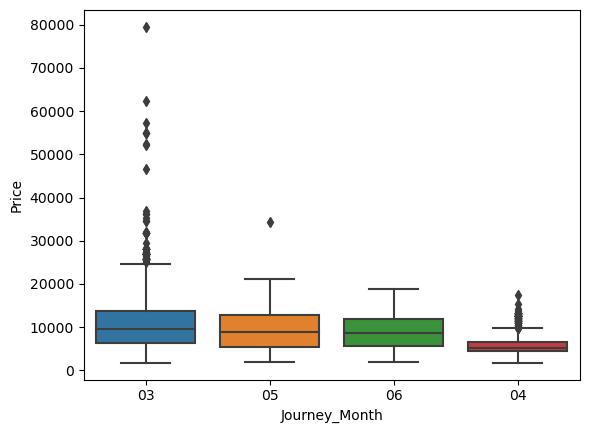

In [55]:
sns.boxplot(x='Journey_Month',y='Price',data=data)

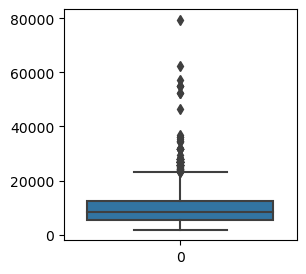

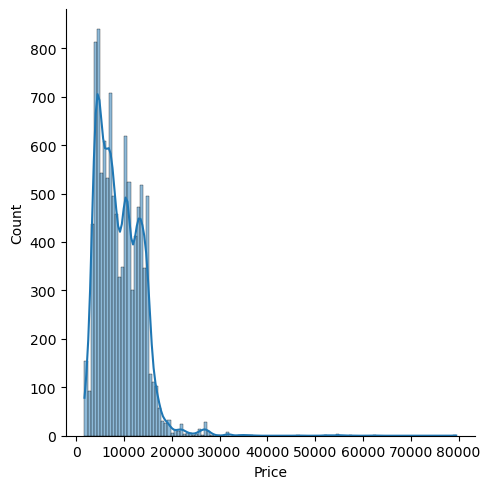

In [56]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Price'])
sns.displot(data['Price'],kde = True)

In [57]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
IQR = q3-q1
low_outlier = q1 - 1.5*IQR
high_outlier = q3 + 1.5*IQR


In [58]:
data['Price'].median()

8372.0

In [59]:
data['Price']=np.where(data['Price'] <= low_outlier ,data['Price'].median(), data['Price'])
data['Price']=np.where(data['Price'] >= high_outlier ,data['Price'].median(), data['Price'])
        

In [60]:
features = data.drop('Price',axis=1)

In [61]:
target = data['Price']

In [62]:
#feature selection

In [63]:
from sklearn.feature_selection import mutual_info_regression


In [64]:
Mutual_Score = mutual_info_regression(features,target)
Mutual_Score

array([1.32124773, 1.06105236, 1.05716004, 0.792391  , 0.36609088,
       0.61580017, 0.91657473, 0.75754865, 1.12160217, 0.90212516,
       1.76953067])

In [65]:
score = pd.DataFrame(Mutual_Score,index=features.columns)
score.columns =['Mutual_Score']
score.sort_values(by = 'Mutual_Score')


,Mutual_Score
Journey_Date,0.366091
Journey_Month,0.615800
Dep_Time_Minute,0.757549
Total_Stops,0.792391
Arrival_Time_Minute,0.902125
Dep_Time_Hour,0.916575
Destination,1.057160
Source,1.061052
Arrival_Time_Hour,1.121602
Airline,1.321248


In [66]:
Corelation =data.corr()
Corelation

,Airline,Source,Destination,Total_Stops,Price,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
Airline,1.000000,0.011298,0.011298,-0.444589,-0.631102,-0.039221,0.080076,-0.072532,0.108036,-0.478981
Source,0.011298,1.000000,1.000000,0.104597,-0.016051,-0.069650,-0.019541,-0.022452,-0.086469,0.008988
Destination,0.011298,1.000000,1.000000,0.104597,-0.016051,-0.069650,-0.019541,-0.022452,-0.086469,0.008988
Total_Stops,-0.444589,0.104597,0.104597,1.000000,0.665288,-0.061476,-0.002618,0.038140,-0.106940,0.738071
Price,-0.631102,-0.016051,-0.016051,0.665288,1.000000,0.006949,-0.053187,0.037648,-0.096945,0.570122
Dep_Time_Hour,-0.039221,-0.069650,-0.069650,-0.061476,0.006949,1.000000,-0.024745,0.005180,0.067911,0.002088
Dep_Time_Minute,0.080076,-0.019541,-0.019541,-0.002618,-0.053187,-0.024745,1.000000,0.043122,-0.017597,-0.019099
Arrival_Time_Hour,-0.072532,-0.022452,-0.022452,0.038140,0.037648,0.005180,0.043122,1.000000,-0.154363,0.051531
Arrival_Time_Minute,0.108036,-0.086469,-0.086469,-0.106940,-0.096945,0.067911,-0.017597,-0.154363,1.000000,-0.069663
Duration_in_min,-0.478981,0.008988,0.008988,0.738071,0.570122,0.002088,-0.019099,0.051531,-0.069663,1.000000


In [67]:
Corelation['Price'].sort_values(ascending =False)

Price                  1.000000
Total_Stops            0.665288
Duration_in_min        0.570122
Arrival_Time_Hour      0.037648
Dep_Time_Hour          0.006949
Source                -0.016051
Destination           -0.016051
Dep_Time_Minute       -0.053187
Arrival_Time_Minute   -0.096945
Airline               -0.631102
Name: Price, dtype: float64

In [68]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
0,9,1,1,0,3897.0,24,03,22,20,1,10,170
1,5,2,2,2,7662.0,1,05,5,50,13,15,445
2,2,3,3,2,13882.0,9,06,9,25,4,25,1140
3,9,2,2,1,6218.0,12,05,18,5,23,30,325
4,9,1,1,1,13302.0,01,03,16,50,21,35,285


In [69]:
features = data.drop('Price',axis=1)

In [70]:
target = data['Price']

In [71]:
features.head()

,Airline,Source,Destination,Total_Stops,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
0,9,1,1,0,24,03,22,20,1,10,170
1,5,2,2,2,1,05,5,50,13,15,445
2,2,3,3,2,9,06,9,25,4,25,1140
3,9,2,2,1,12,05,18,5,23,30,325
4,9,1,1,1,01,03,16,50,21,35,285


In [72]:
final_index = features.columns

In [73]:
#model building

In [74]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=0)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
reg = RandomForestRegressor()

In [77]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
y_pred = reg.predict(x_test)

In [79]:
from sklearn import metrics

In [80]:
metrics.r2_score(y_pred,y_test)

0.7425676107490742

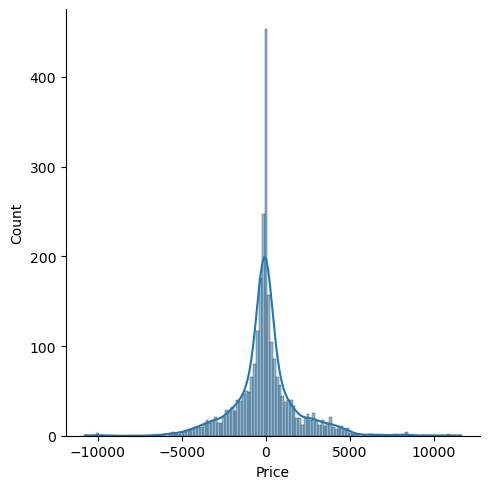

In [81]:
import seaborn as sns
sns.displot(y_test - y_pred,kde =True)

In [82]:
from sklearn.metrics import mean_squared_error


In [83]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1901.017244708352

In [84]:
user_input = []

In [85]:
airline = input("Enter airline")

Enter airlineIndiGo


In [86]:
if airline in airline_dic:
    mapped_value = airline_dic[airline]
    user_input.append(int(mapped_value))
   

In [88]:
source = input("Enter source")

Enter sourceBanglore


In [89]:
user_input.append(int(source_dic[source]))

In [92]:
desti = input("Enter destination")

Enter destinationDelhi


In [93]:
desti = desti.replace('New Delhi','Delhi')

In [94]:
user_input.append(int(des_dic[desti]))

In [95]:
user_input

[9, 1, 1]

In [96]:
total_stops = input("Enter the number of stops (0,1,2,3,4):")

Enter the number of stops (0,1,2,3,4):0


In [97]:
user_input.append(int(total_stops))

In [98]:
journey_data = input("Enter the date of journey (1 to 31):")

Enter the date of journey (1 to 31):24


In [99]:
user_input.append(int(journey_data))

In [100]:
journey_month = input("Enter the month of journey (1 to 12):")

Enter the month of journey (1 to 12):3


In [101]:
user_input.append(int(journey_month))

In [102]:
dept_time=input("Departure time (Ex:12:50)")

Departure time (Ex:12:50)22:20


In [103]:
 dept_time = pd.to_datetime(dept_time)

In [104]:
def part_time_users(x):
    hr = x.hour
    mins = x.minute
    return hr,mins

In [105]:
dept_hr,dept_min = part_time_users(dept_time)

In [106]:
user_input

[9, 1, 1, 0, 24, 3]

In [107]:
user_input.append(dept_hr)
user_input.append(dept_min)

In [108]:
arrival_time=input("Arrival time (Ex:12:50)")

Arrival time (Ex:12:50)01:10


In [109]:
arrival_time = pd.to_datetime(arrival_time)

In [110]:
arr_hr,arr_min = part_time_users(arrival_time)

In [111]:
user_input.append(arr_hr)
user_input.append(arr_min)

In [112]:
duration = input("Total duration (Ex:12h 50m)")

Total duration (Ex:12h 50m)2h 50m


In [113]:
user_input.append(preprocess_duration(duration))

In [114]:
user_input

[9, 1, 1, 0, 24, 3, 22, 20, 1, 10, 170]

In [115]:
df = pd.DataFrame([user_input], columns=final_index)

In [116]:
df

,Airline,Source,Destination,Total_Stops,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_in_min
0,9,1,1,0,24,3,22,20,1,10,170


In [117]:
value = reg.predict(df)
value

array([5220.57089683])

In [118]:
print('The price for the airline ranges between',int(value-rmse),'and',int(value+rmse))

The price for the airline ranges between 3319 and 7121
